# GUC NETW 1003 K-means Assignment 1 & 2

* Abdelrahman Gelany
* 43-17100
- IET-Networks
- NETW 1013 Machine Learning

Objective: exercise is to learn how to use build and use  kmeans clustering algorithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters on the perfromance of the algorithm .
> 3. Understand the effect of distance.

###### import required libraries 

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

import sys
import random
import math

from sklearn.cluster import KMeans

###### read the data

In [2]:
df = pd.read_csv('Customer data.csv')

###### Normalization

In [3]:
# the scaler - for robust scaling of Normalization
from sklearn.preprocessing import RobustScaler

# set up the scaler
scaler = RobustScaler()
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html
f = pd.DataFrame(df['Income'])
# fit the scaler to the train set, it will learn the parameters
scaler.fit(f)
# transform train and test sets
df_scaled = scaler.transform(f)
# let's transform the returned NumPy arrays to dataframes
df_scaled = pd.DataFrame(df_scaled, columns=f.columns)

df_scaled

,Income
0,0.225729
1,0.871699
2,-0.651798
3,1.386238
4,0.828590
...,...
1995,0.197394
1996,0.054332
1997,-0.721337
1998,-0.435064


In [4]:
df['Income']=df_scaled

In [5]:
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,0.225729,1,2
1,100000002,1,1,22,1,0.871699,1,2
2,100000003,0,0,49,1,-0.651798,0,0
3,100000004,0,0,45,1,1.386238,1,1
4,100000005,0,0,53,1,0.828590,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,0.197394,0,0
1996,100001997,1,1,27,1,0.054332,1,0
1997,100001998,0,0,31,0,-0.721337,0,0
1998,100001999,1,1,24,1,-0.435064,0,0


Remove the first column; because no benefit returned from clustering the IDs

In [6]:
# Remove 1st column
df.drop(['ID'], axis = 1, inplace = True)

In [7]:
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,0.225729,1,2
1,1,1,22,1,0.871699,1,2
2,0,0,49,1,-0.651798,0,0
3,0,0,45,1,1.386238,1,1
4,0,0,53,1,0.828590,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,0.197394,0,0
1996,1,1,27,1,0.054332,1,0
1997,0,0,31,0,-0.721337,0,0
1998,1,1,24,1,-0.435064,0,0


## 1. Wirte K-means function

> ### 1.1. methods implementation 

> multiple method is used to implement K-means algorithm

* Read Data of the csv file
* Initialize Means(cluster centroids)  
* using the two distance type as a metric of similarity for our data set
    - Ecluidian distance
    - Pearson distance
* Update the Means after each datapoint in dataset 
* Classify an item into a cluster
* Find Means
* Find the clusters, given the means


> use distortion function and Elbow method to evaluate the performance of the K-means calculations

* Getting the best centroids and best clusters for certain 'k' using Distortion function
* Getting the best k by using the distortion function

In [10]:
def ReadData(DfName):
 
    items = DfName.values.tolist()
    return items;


In [11]:
def FindColMinMax(items):
    n = len(items[0]);
    minima = [sys.maxsize for i in range(n)];
    maxima = [-sys.maxsize -1 for i in range(n)];
     
    for item in items:
        for f in range(len(item)):
            if (item[f] < minima[f]):
                minima[f] = item[f];
             
            if (item[f] > maxima[f]):
                maxima[f] = item[f];
 
    return minima,maxima;

In [14]:
def checkIfDuplicates_3(listOfElems):
    ''' Check if given list contains any duplicates '''    
    for elem in listOfElems:
        if listOfElems.count(elem) > 1:
            return True
    return False

In [15]:
def InitializeMeans(items, k, cMin, cMax):
 
    # Initialize means to random numbers between
    # the min and max of each column/feature   
    f = len(items[0]); # number of features
    means = [[0 for i in range(f)] for j in range(k)];
     
    for mean in means:
        for i in range(len(mean)):
 
            # Set value to a random float
            # (adding +-1 to avoid a wide placement of a mean)
            mean[i] = random.uniform(cMin[i]+1, cMax[i]-1);
    
    #check for duplicates
    if(checkIfDuplicates_3(means) == True):
        InitializeMeans(items, k, cMin, cMax)
    else:
        return means;

In [16]:
def EuclideanDistance(x, y):
    S = 0; # The sum of the squared differences of the elements
    for i in range(len(x)):
        S += math.pow(x[i]-y[i], 2)
 
    #The square root of the sum
    return math.sqrt(S)

In [17]:
def PearsonDistance(item, centroid):
    res = 1-(np.corrcoef(item, centroid)[0][1])
    return res

Example

In [18]:
PearsonDistance([0.0, 0.0, 67.0, 2.0, 0.22572941671409835, 1.0, 2.0], [0.0, 0.0, 49.0, 1.0, -0.6517978668118488, 0.0, 0.0])

0.0003832982634188742

In [19]:
from scipy import stats
def pearson_dist(x, y):
    r = stats.pearsonr(x, y)[0]
    return (1 - r) / 2

In [20]:
pearson_dist(df.loc[0] , df.loc[1])

0.00038348251180103654

In [21]:
np.corrcoef(df.loc[0] , df.loc[1])[0][1]

0.9992330349763976

In [22]:
np.linalg.norm(df.loc[0] - df.loc[1])

45.0379537411014

In [23]:
type(df.loc[0])

pandas.core.series.Series

another example

In [24]:
c1 = [1,4,6]
x3 = [7,2,1]

In [26]:
pearson_dist(pd.Series(x3) , pd.Series(c1))

0.9841503155153184

In [27]:
1-np.corrcoef(pd.Series(c1) , pd.Series(x3))[0][1]

1.9683006310306366

In [28]:
np.linalg.norm(pd.Series(x3) - pd.Series(c1))

8.06225774829855

another example

In [29]:
c1 = [1,4,6]
x1 = [3,6,2]

In [30]:
1-np.corrcoef(pd.Series(x1) , pd.Series(c1))[0][1]

1.1272569525951557

In [31]:
def UpdateMean(n,mean,item):
    for i in range(len(mean)):
        m = mean[i];
        m = (m*(n-1)+item[i])/float(n);
        mean[i] = round(m, 3);
     
    return mean;

In [32]:
def Classify(means,item,distanceType):
 
    # Classify item to the mean with minimum distance   
    minimum = sys.maxsize;
    index = -1;
 
    #check for distance type
    if(distanceType == 'Euclidean'):
        for i in range(len(means)):
            # Find distance from item to mean
            dis = EuclideanDistance(item, means[i]);

            if (dis < minimum):
                minimum = dis;
                index = i;
                
    else:
        for i in range(len(means)):
            # Find distance from item to mean
            dis = PearsonDistance(item, means[i]);

            if (dis < minimum):
                minimum = dis;
                index = i;
     
    return index;

In [33]:
def CalculateMeans(k,items,distanceType,maxIterations=100000): 
    #this method do not care if the first intialization of means were not efficient
    #the maxIterations is not the stoppage condition, but it is the condition that makes sure that the centroids (means) settle by the best assigning to datapoints 
    #then I use the distortion function evaluate the perfromance of the choices
    
    # Find the minima and maxima for columns
    cMin, cMax = FindColMinMax(items);
     
    # Initialize means at random points
    means = InitializeMeans(items,k,cMin,cMax);
     
    # Initialize clusters, the array to hold
    # the number of items in a class
    clusterSizes= [0 for i in range(len(means))];
 
    # An array to hold the cluster an item is in
    belongsTo = [0 for i in range(len(items))];
 
    # Calculate means
    for e in range(maxIterations): ######## until centroids (means) settle 
 
        # If no change of cluster occurs, halt
        noChange = True;
        for i in range(len(items)):
 
            item = items[i];
 
            # Classify item into a cluster and update the
            # corresponding means.       
            index = Classify(means,item,distanceType);
 
            clusterSizes[index] += 1;
            cSize = clusterSizes[index];
            means[index] = UpdateMean(cSize,means[index],item);
 
            # Item changed cluster
            if(index != belongsTo[i]):
                noChange = False;
 
            belongsTo[i] = index;
 
        # Nothing changed, return
        if (noChange):
            break;
 
    return means;

In [34]:
def FindClusters(means,items,distanceType):
    Labels = []
    clusters = [[] for i in range(len(means))]; # Init clusters
     
    for item in items:
 
        # Classify item into a cluster
        index = Classify(means,item,distanceType);
        # Specify Label to each item
        Labels.append(index)
 
        # Add item to cluster
        clusters[index].append(item);
 
    return clusters,Labels;

> ### 1.2. methods evaluation 

>> ###### 1.2.1 Getting the best centroids and best clusters for certain 'k' using Distortion function

In [35]:
def Distortion(k,dataframe,distanceType):
    # it calulates the disance bet. the first centroid of cluster one and the points belong to this cluster...etcetra
    # until the end of clusters.
    # all this for certain 'k'
    MyItems = ReadData(dataframe)
    cost=[]
    AllMeans=[]
    AllCLusters=[]
    AllLabels=[]
    for p in range(10): #choose best choices from 10 possible ones (10 diff. means intializations)
        means=CalculateMeans(k,MyItems,distanceType,maxIterations=100000)
        AllMeans.append(means)
        Res=FindClusters(means,MyItems,distanceType)
        AllCLusters.append(Res[0])
        AllLabels.append(Res[1])
        
        #calculate the distortion function value for each of choices
        summation = 0
        for i in range(len(Res[0])):
            for j in range(len(Res[0][i])):
                summation += np.power(np.array(Res[0][i][j])-np.array(means[i]), 2)
        cost.append(sum(summation)/len(MyItems)) # for one K, getting the best one of intialization of means
                       
    # for this certain 'k'
    bestCost = min(cost)
    min_index = cost.index(bestCost)
    bestMeans = AllMeans[min_index]
    bestClusters = AllCLusters[min_index]
    bestLabels = AllLabels[min_index]
    
    
    return bestCost,bestMeans,bestClusters,bestLabels

>> ###### 1.2.2 Best K value using Elbow method

In [36]:
def ELbow(Klower,Kupper,dataframe,distanceType):
    x_values = [] # k
    y_values = [] # D(k)
    for num_of_clusters in range(Klower, Kupper):
        x_values.append(num_of_clusters)
        y_values.append(Distortion(num_of_clusters,dataframe,distanceType)[0])
    
    # Specify the ELbow Point
    from knee_locator import KneeLocator
    kn = KneeLocator(x_values, y_values, curve='convex', direction='decreasing')
    print(f'k : {kn.knee}')
    plt.vlines(kn.knee, min(y_values), max(y_values), linestyles='dashed')
    
    # Graph implementation
    plt.plot(x_values, y_values, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method using Distortion')
    plt.show()

>> ###### 1.2.3 Test the visulization

k : 3


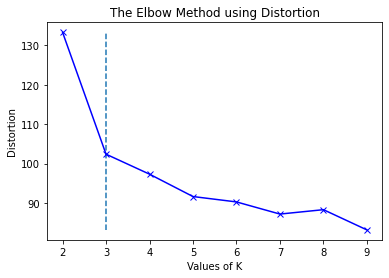

In [26]:
ELbow(2,10,df,'Pearson')

k : 4


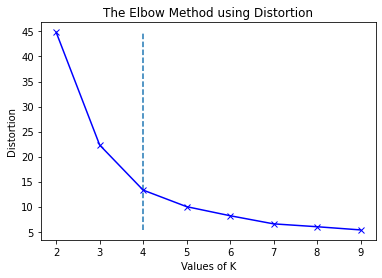

In [77]:
ELbow(2,10,df,'Euclidean')

k : 4


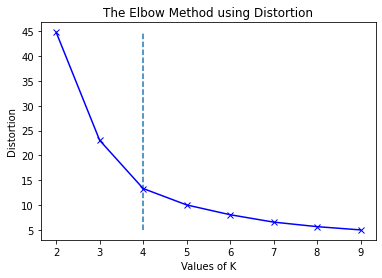

In [42]:
ELbow(2,10,df,'Euclidean')

## 2. Display Results 

* Below is a an example function that displays Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [37]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [38]:
# helper function that allows us to display data in 2 dimensions and highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmykbrgcmyk'  #List colors (colour letters should equal no. of clusters)
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km['labels_']==i,0],X[km['labels_']==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km['cluster_centers_'][i][0],km['cluster_centers_'][i][1],c = color[i], marker = 'x', s = 100)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by Example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters (to show the elbow)
4. Change the distance function and repeat the above steps 

> #### 3.1. Example 1 : Circular Data Gen and display 

* below is an example of how to use the function 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import from a file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the function 

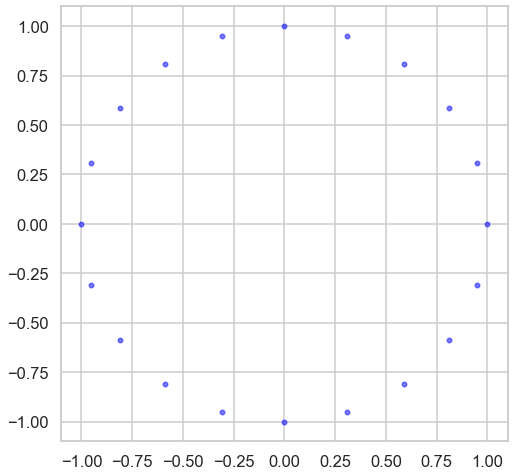

In [39]:
# prepare the figure size and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import from a file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X1 = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the function 
display_cluster(X1)

> #### 3.1. Testing the GUC_Kmean function on Example 1

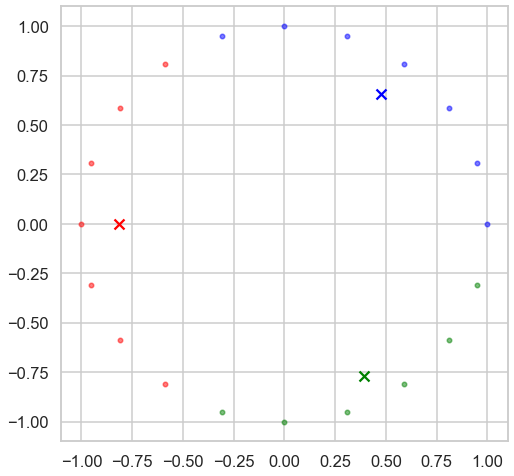

In [59]:
#no. of clusters
k = 3

#KM[] refers to each datapoint belong to which cluster
km = {'labels_':np.array(Distortion(k,pd.DataFrame(X1),'Euclidean')[3]) , 'cluster_centers_':Distortion(k,pd.DataFrame(X1),'Euclidean')[1]}

#visualize
display_cluster(X1,km,num_clusters=k)

k : 3


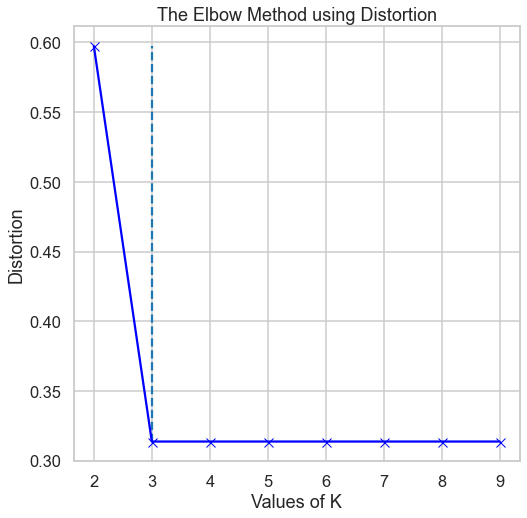

In [60]:
ELbow(2,10,pd.DataFrame(X1),'Euclidean')

In [42]:
from itertools import combinations
cc= list(combinations(df.columns,2))
cc

# for c in cc:
#     print(c)

[('Sex', 'Marital status'),
 ('Sex', 'Age'),
 ('Sex', 'Education'),
 ('Sex', 'Income'),
 ('Sex', 'Occupation'),
 ('Sex', 'Settlement size'),
 ('Marital status', 'Age'),
 ('Marital status', 'Education'),
 ('Marital status', 'Income'),
 ('Marital status', 'Occupation'),
 ('Marital status', 'Settlement size'),
 ('Age', 'Education'),
 ('Age', 'Income'),
 ('Age', 'Occupation'),
 ('Age', 'Settlement size'),
 ('Education', 'Income'),
 ('Education', 'Occupation'),
 ('Education', 'Settlement size'),
 ('Income', 'Occupation'),
 ('Income', 'Settlement size'),
 ('Occupation', 'Settlement size')]

> #### 3.2. Example 2 : Multi blob Data Gen and display 

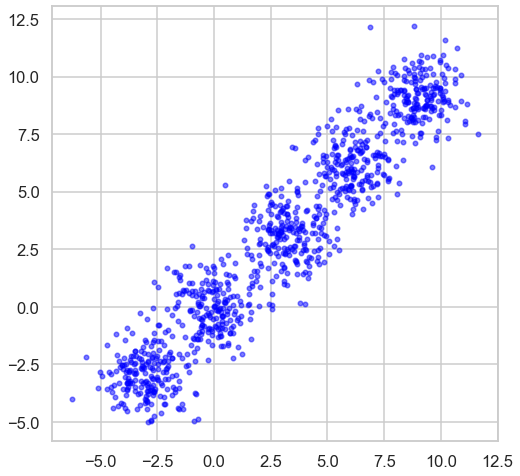

In [52]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X2, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X2)

> #### 3.2. Testing the GUC_Kmean function on Example 2

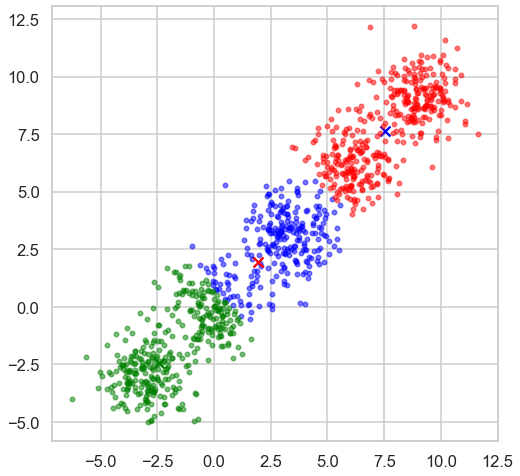

In [53]:
#no. of clusters
k = 3

#KM[] refers to each datapoint belong to which cluster
km = {'labels_':np.array(Distortion(k,pd.DataFrame(X2),'Euclidean')[3]) , 'cluster_centers_':Distortion(k,pd.DataFrame(X2),'Euclidean')[1]}

#visualize
display_cluster(X2,km,num_clusters=k)

k : 5


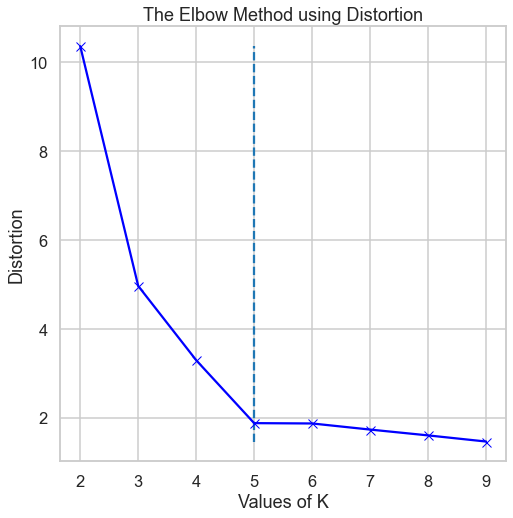

In [61]:
ELbow(2,10,pd.DataFrame(X2),'Euclidean')

#### 3.3. Example 3 : moons Data Gen and display 

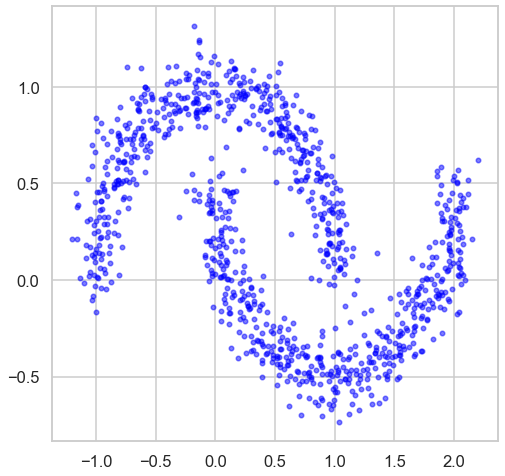

In [40]:
n_samples = 1000
X3, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X3)

> #### 3.3. Testing the GUC_Kmean function on Example 3

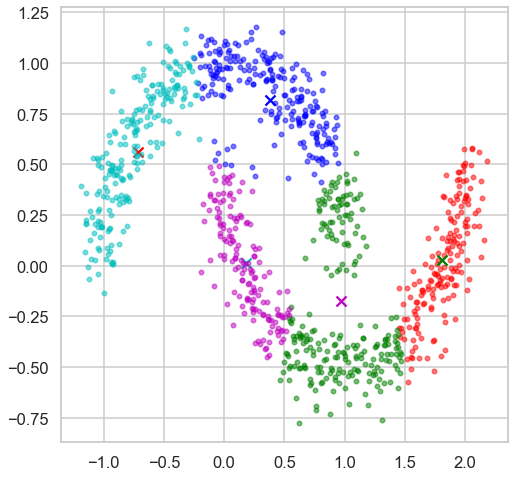

In [65]:
#no. of clusters
k = 5

#KM[] refers to each datapoint belong to which cluster
km = {'labels_':np.array(Distortion(k,pd.DataFrame(X3),'Euclidean')[3]) , 'cluster_centers_':Distortion(k,pd.DataFrame(X3),'Euclidean')[1]}

#visualize
display_cluster(X3,km,num_clusters=k)

k : 4


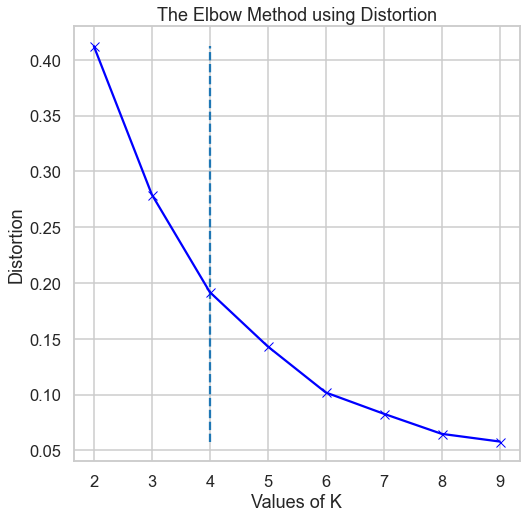

In [41]:
ELbow(2,10,pd.DataFrame(X3),'Euclidean')

## 4. Using the GUC_Kmean function to segment customers in the provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [43]:
def Two_D(TheDataFrame,k,distanceType):
    
    #All unique possible combinations of the dataframe
    from itertools import combinations
    cc= list(combinations(TheDataFrame.columns,2))

    #loop over each combination
    for i in range(len(list(combinations(TheDataFrame.columns,2)))):
        tmp = pd.concat([TheDataFrame[cc[i][0]],(TheDataFrame[cc[i][1]])],axis = 1)
        
        #no. of clusters=k
        #convert series to dataframe
        dataframe = pd.DataFrame(tmp)

        #KM[] refers to each datapoint belong to which cluster
        km = {'labels_':np.array(Distortion(k,dataframe,distanceType)[3]) , 'cluster_centers_':Distortion(k,dataframe,distanceType)[1]}

        #visualize
        display_cluster(np.array(dataframe),km,num_clusters=k)
        plt.title(f'{(dataframe.columns).tolist()}\n',fontsize = 14, fontweight ='bold')
        plt.figure()
        
        ELbow(2,10,dataframe,distanceType)

In [ ]:
Two_D(df,4,'Pearson')

k : 4


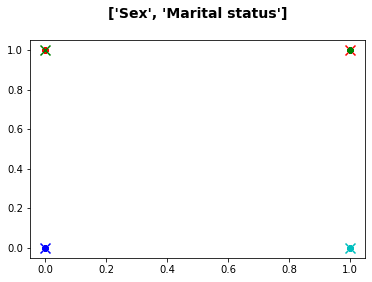

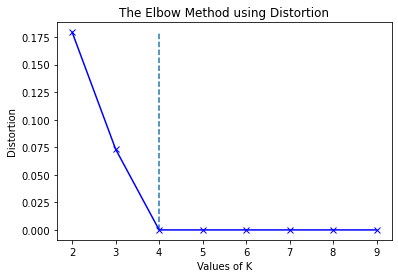

k : 4


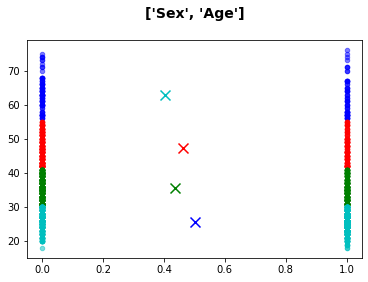

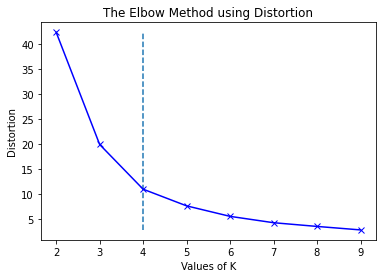

k : 3


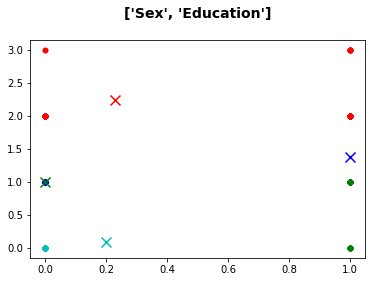

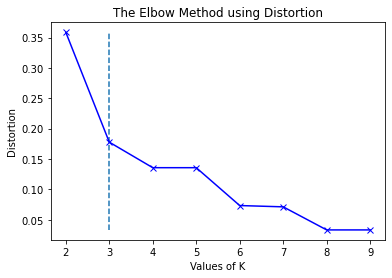

k : 5


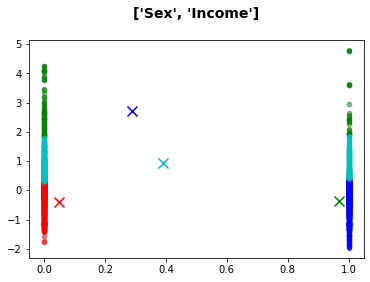

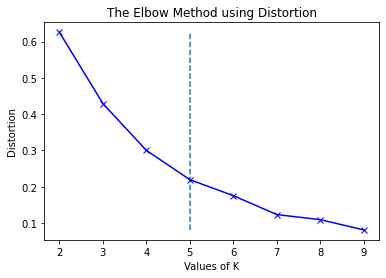

k : 4


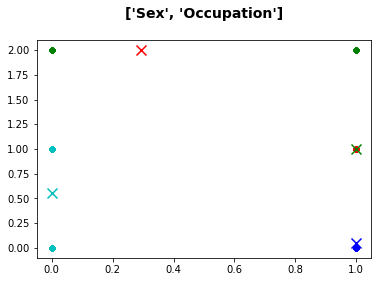

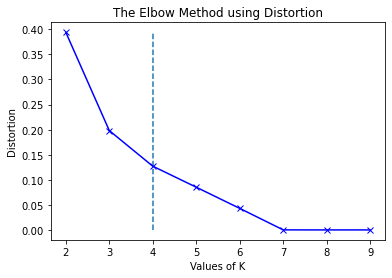

k : 4


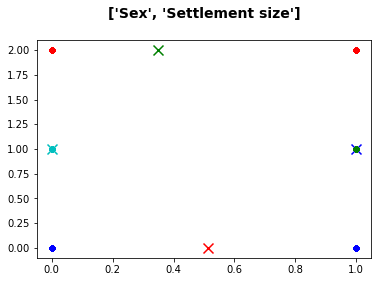

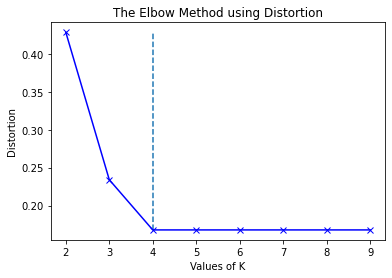

k : 4


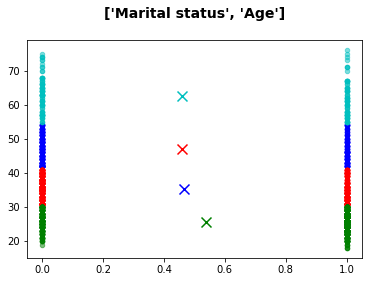

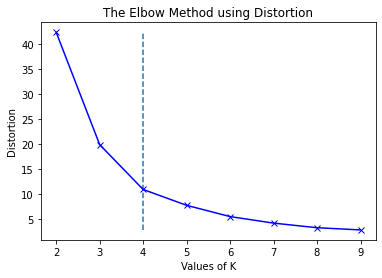

k : 5


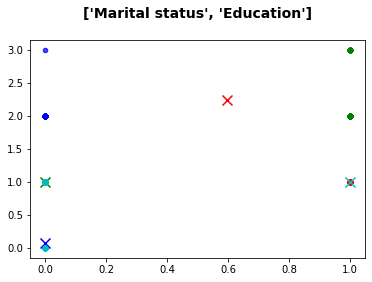

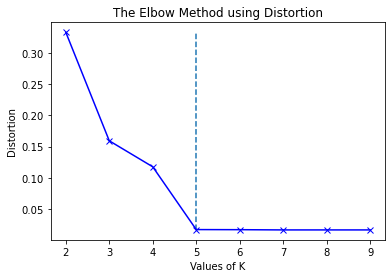

k : 5


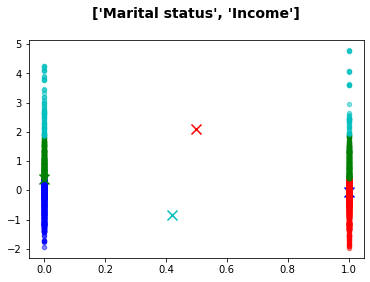

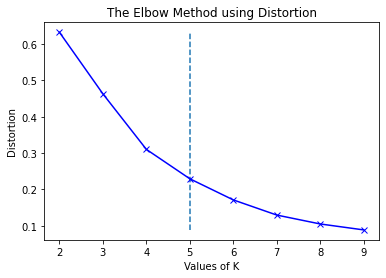

k : 5


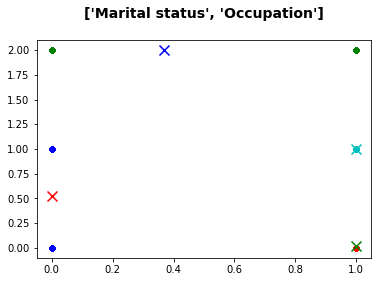

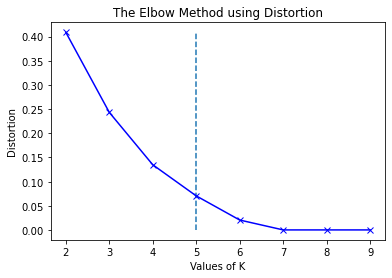

k : 4


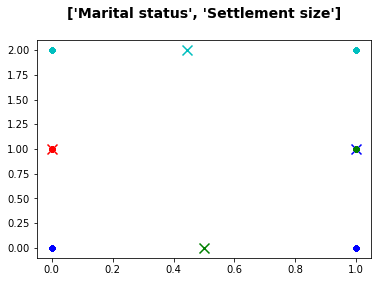

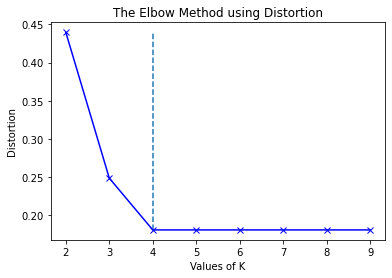

k : 4


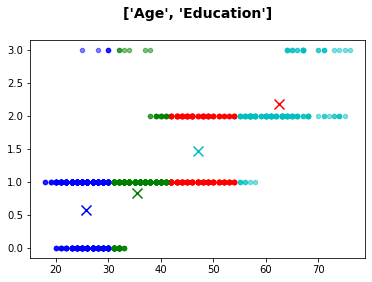

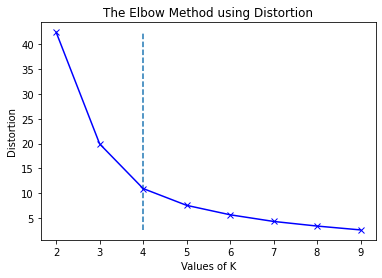

k : 4


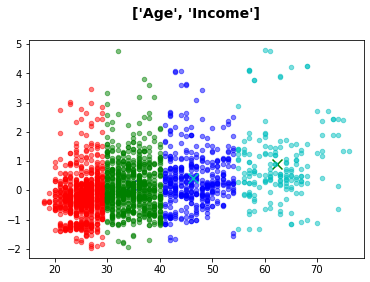

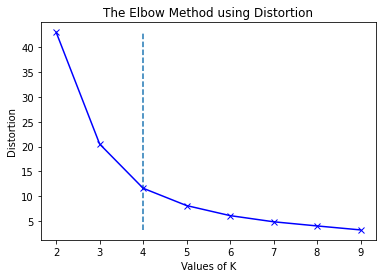

k : 4


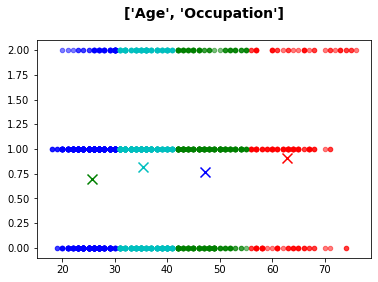

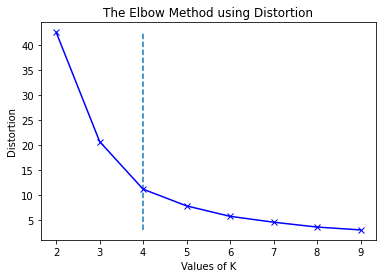

k : 4


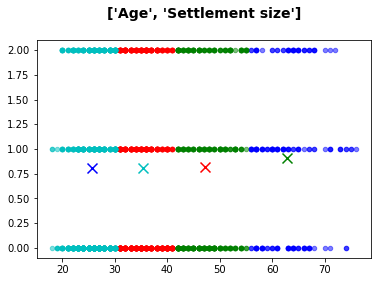

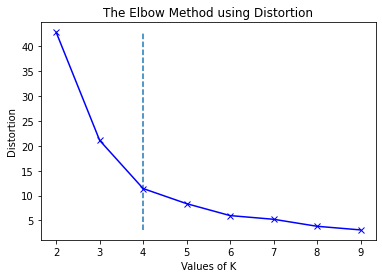

k : 5


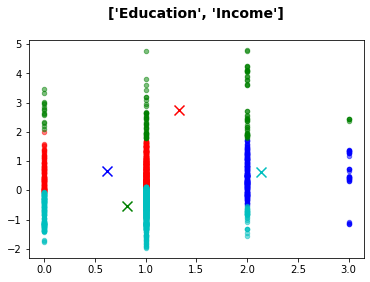

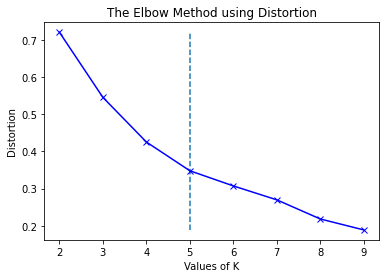

k : 6


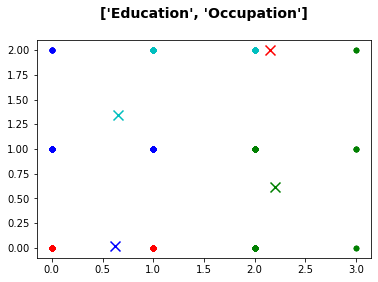

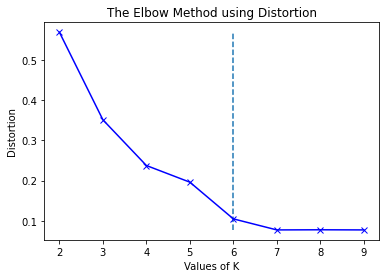

k : 5


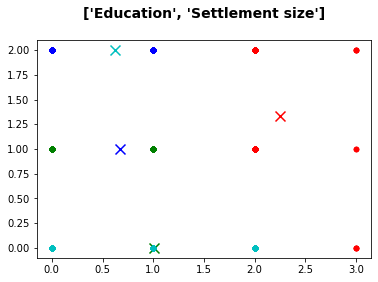

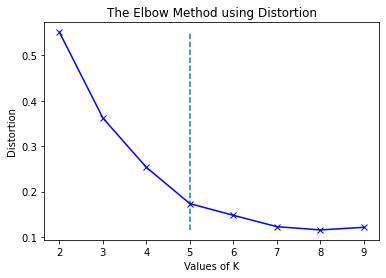

k : 4


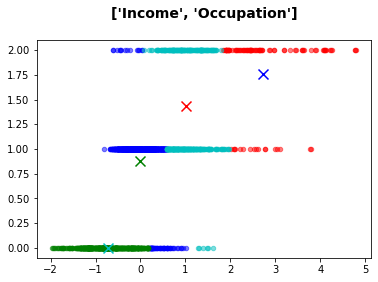

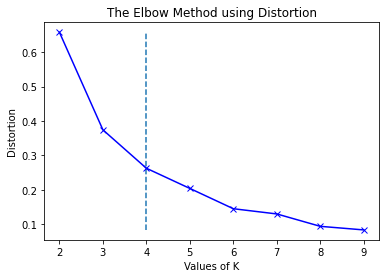

k : 5


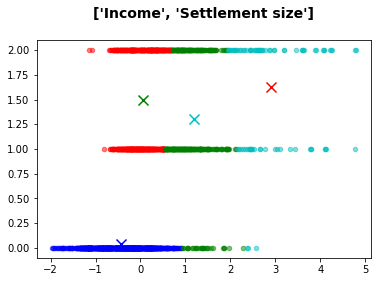

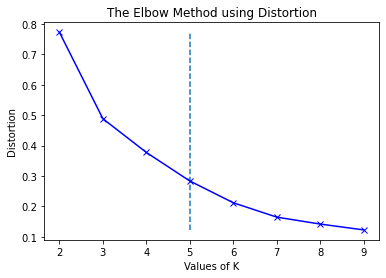

In [ ]:
Two_D(df,4,'Euclidean')

Last graph is not there due to kernel dead but it is there in the next line visualization

k : 4


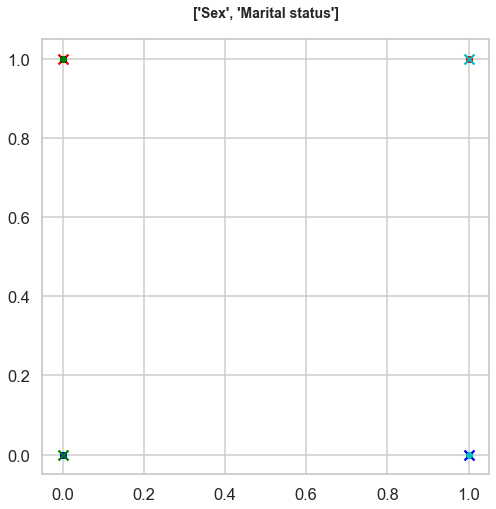

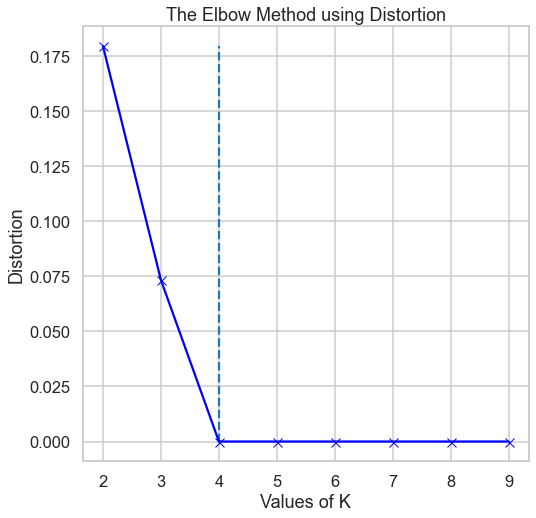

k : 4


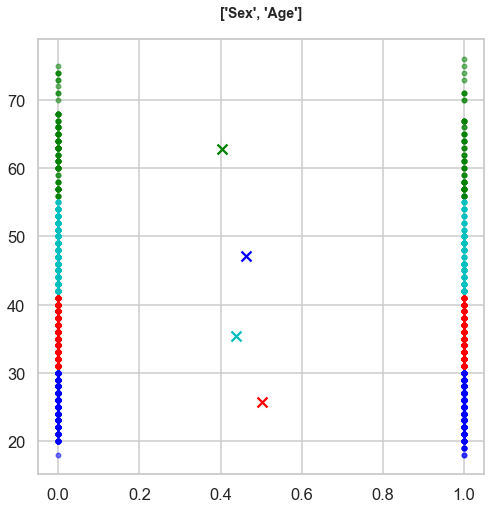

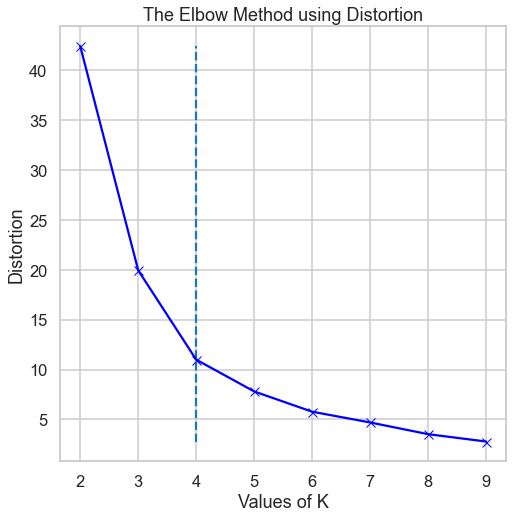

k : 5


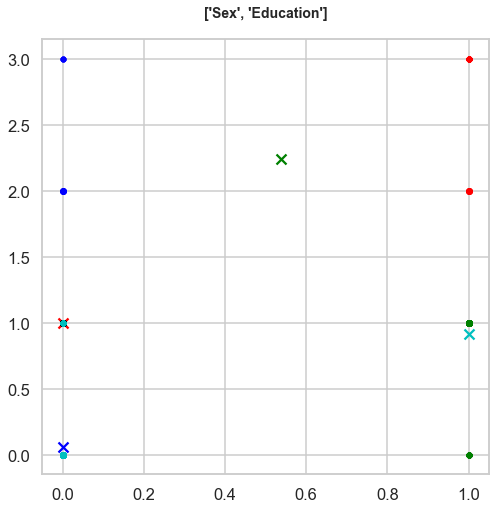

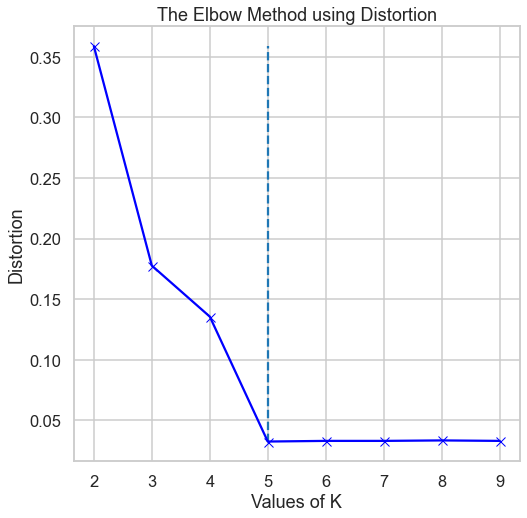

k : 5


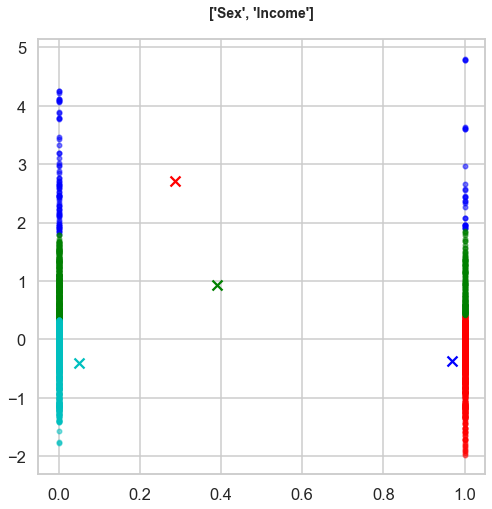

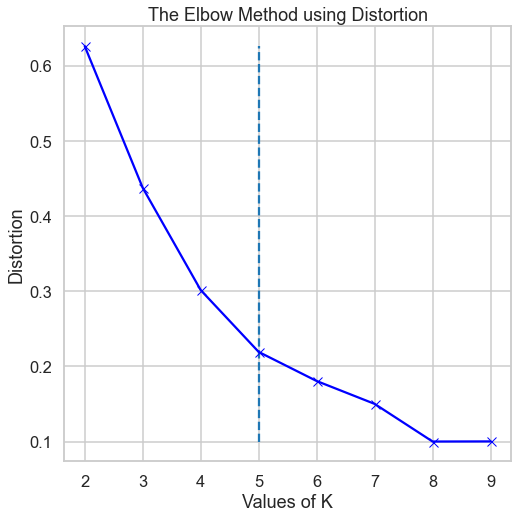

k : 4


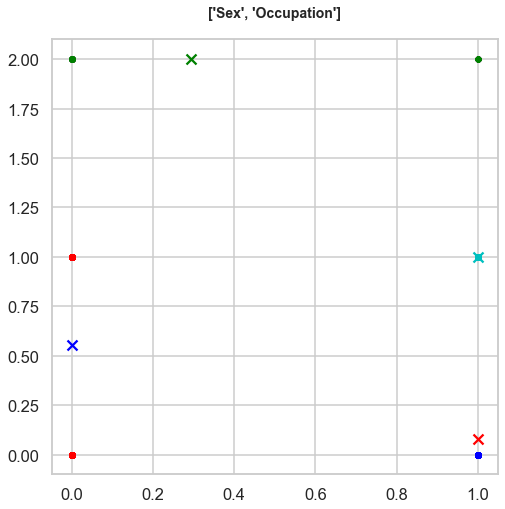

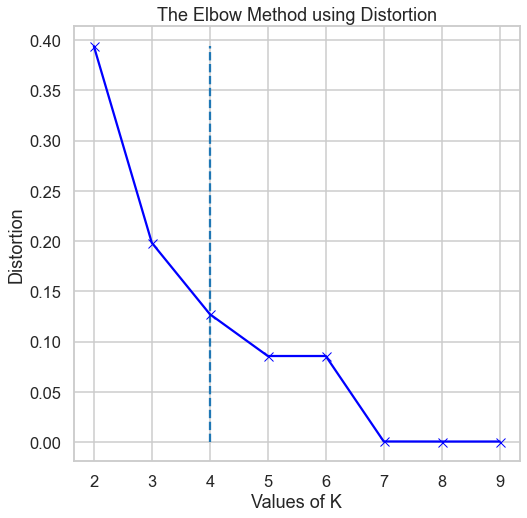

k : 4


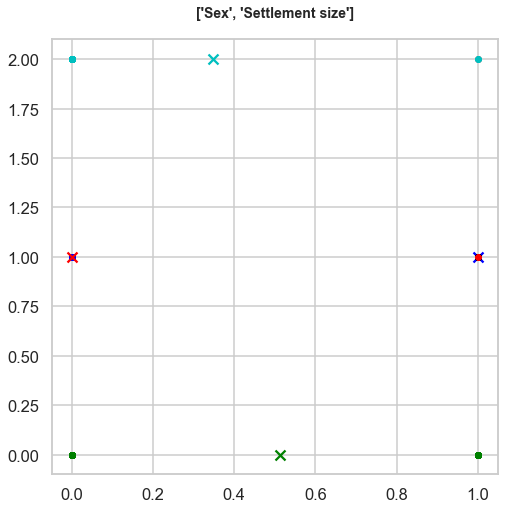

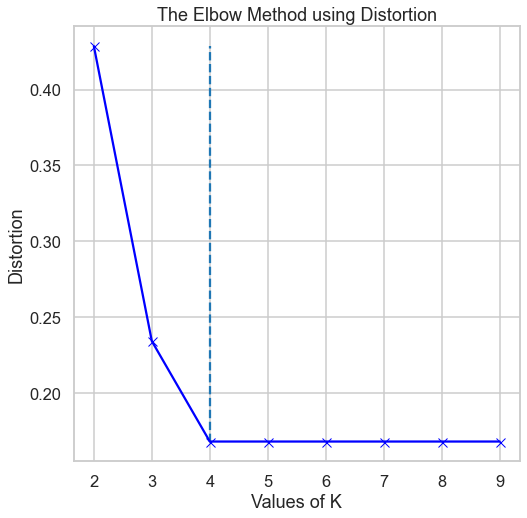

k : 4


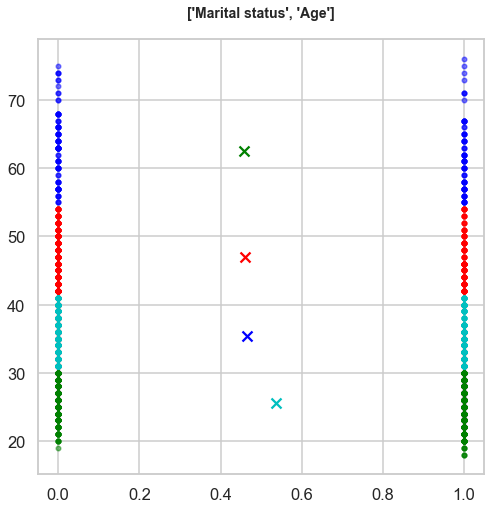

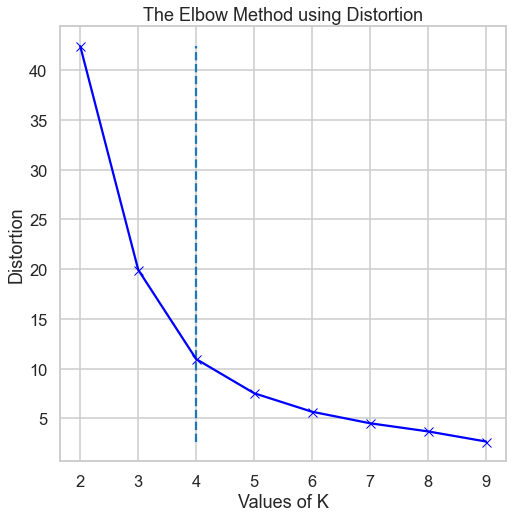

k : 5


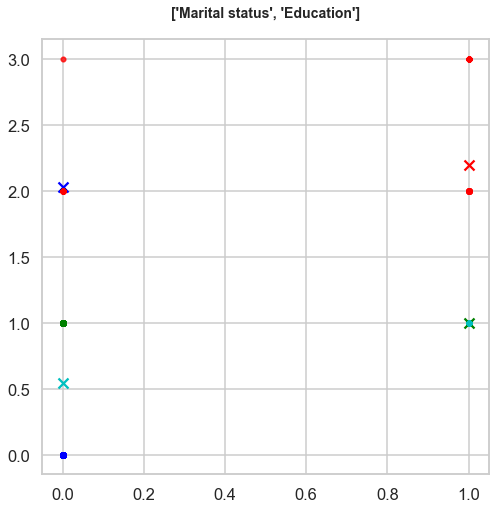

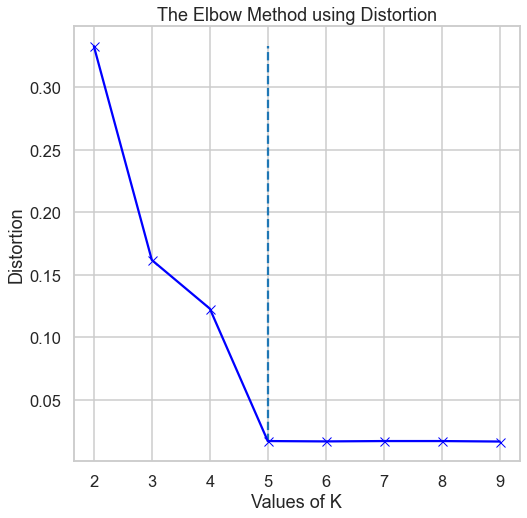

k : 5


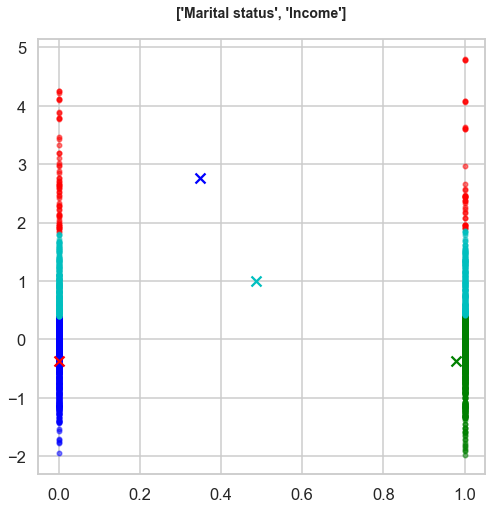

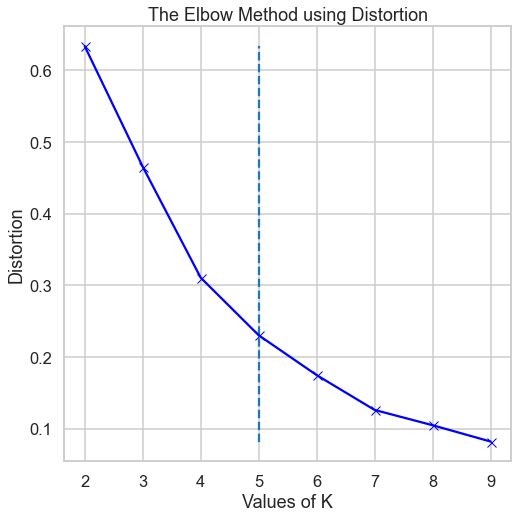

k : 6


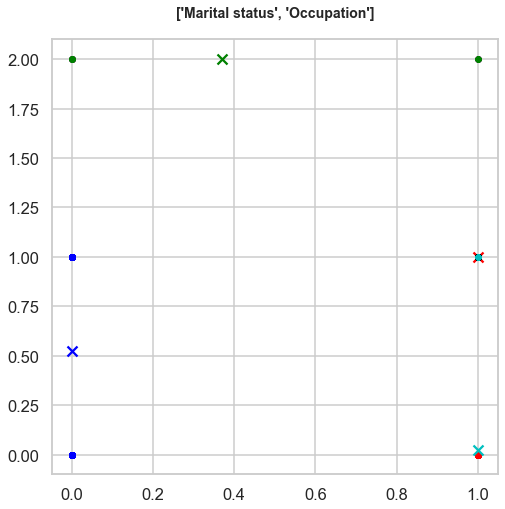

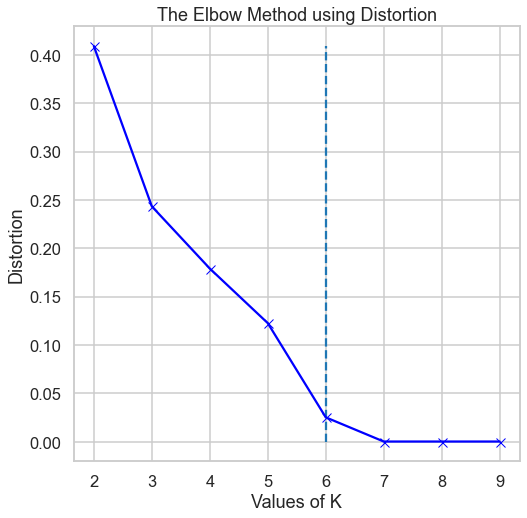

k : 4


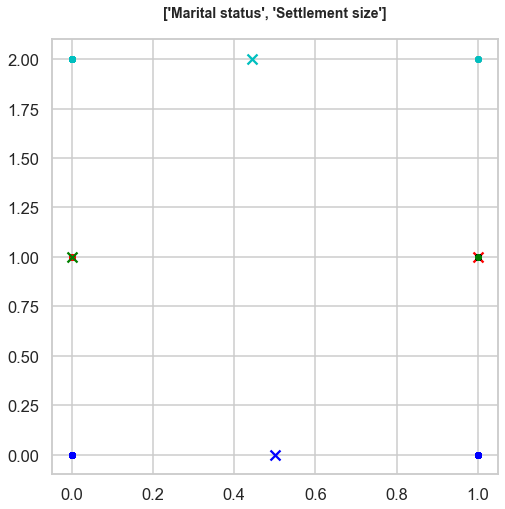

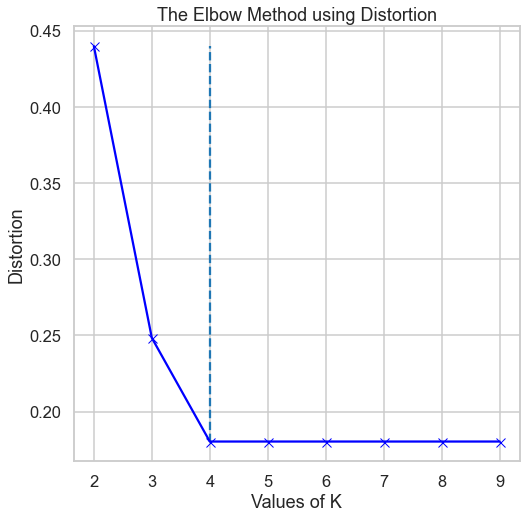

k : 4


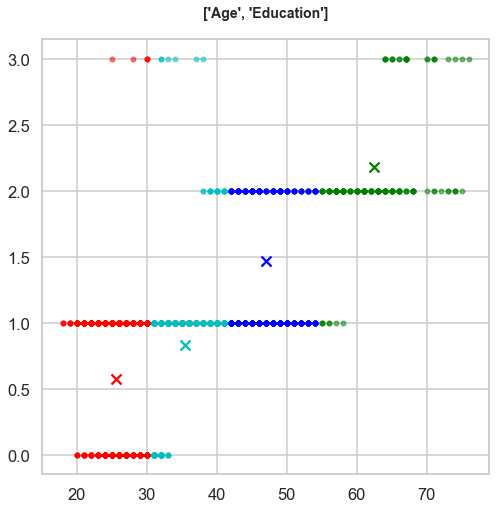

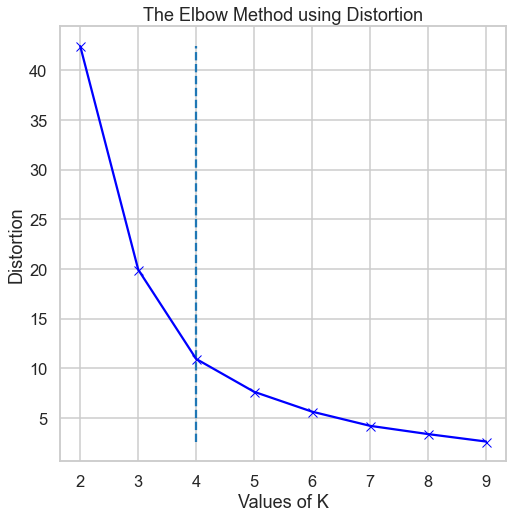

k : 4


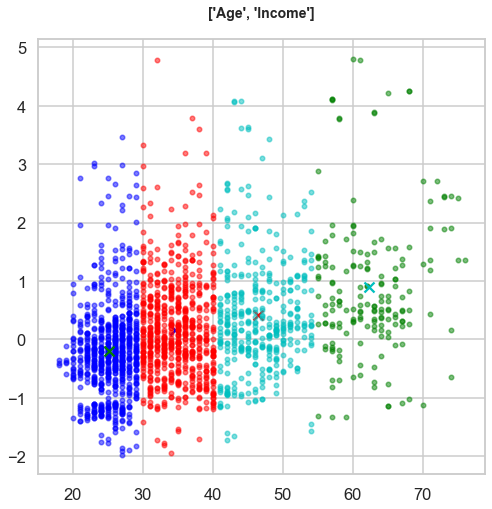

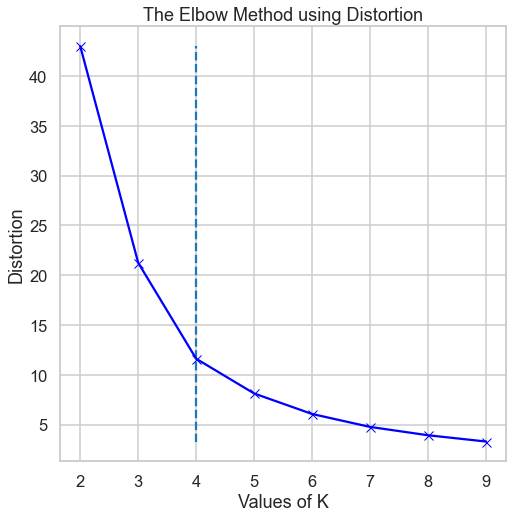

k : 4


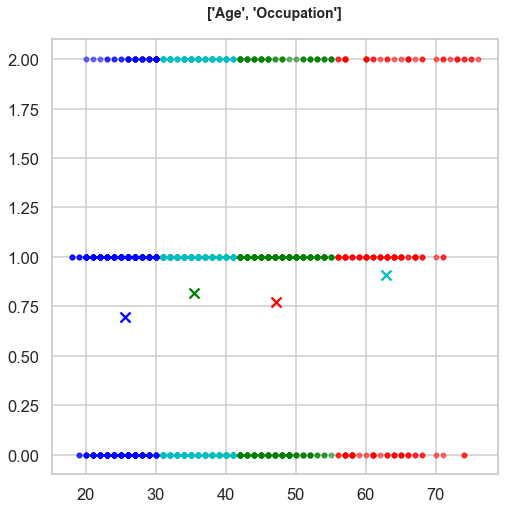

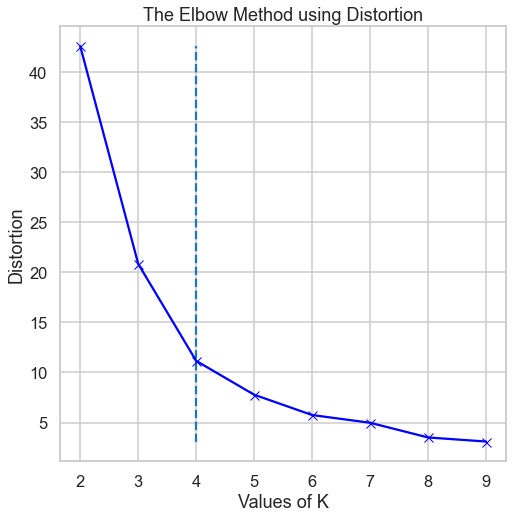

k : 4


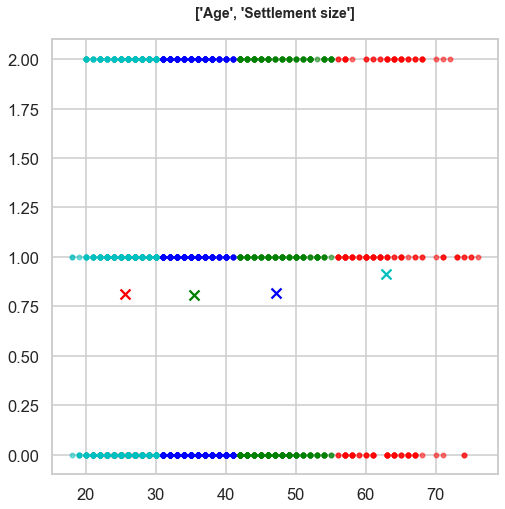

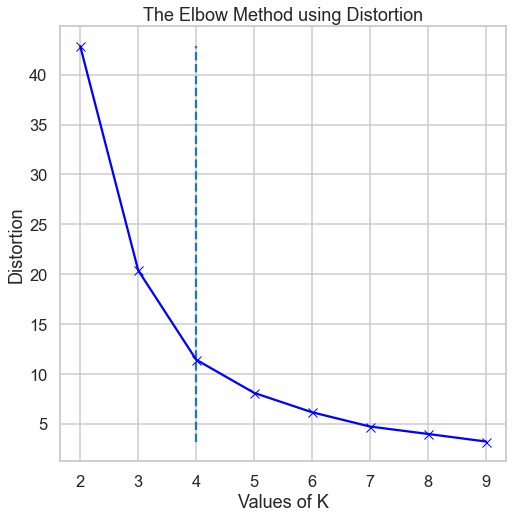

k : 7


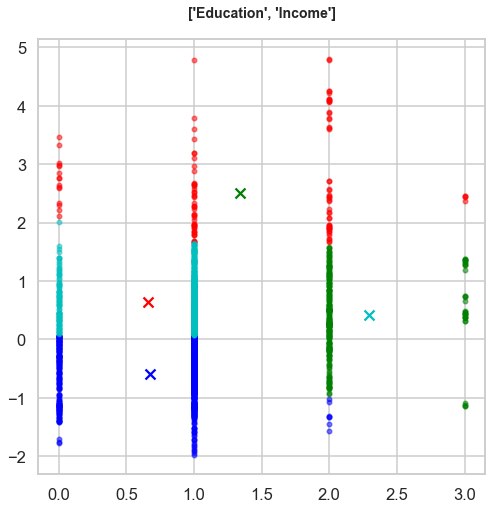

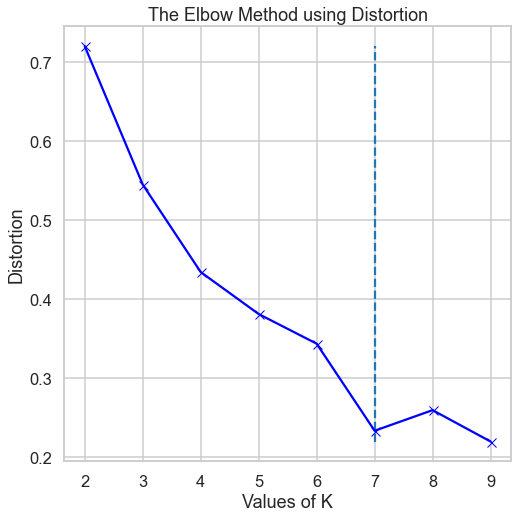

k : 5


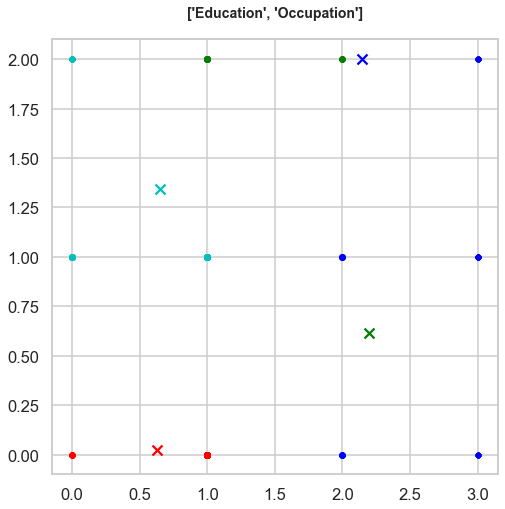

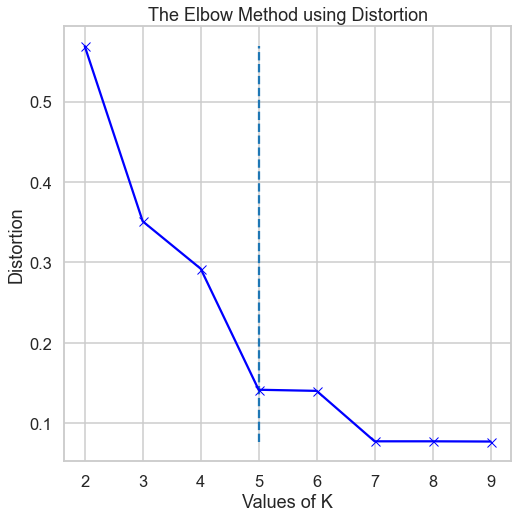

k : 5


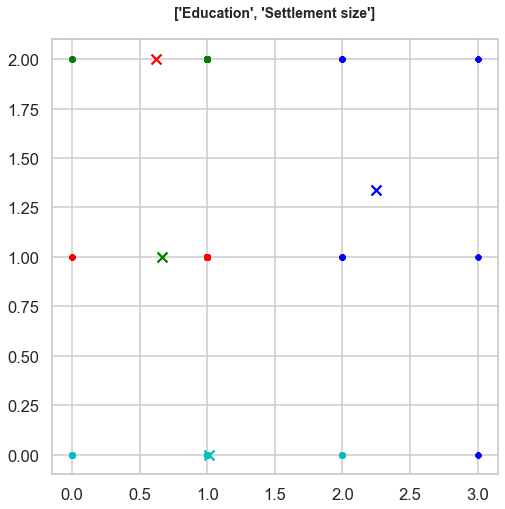

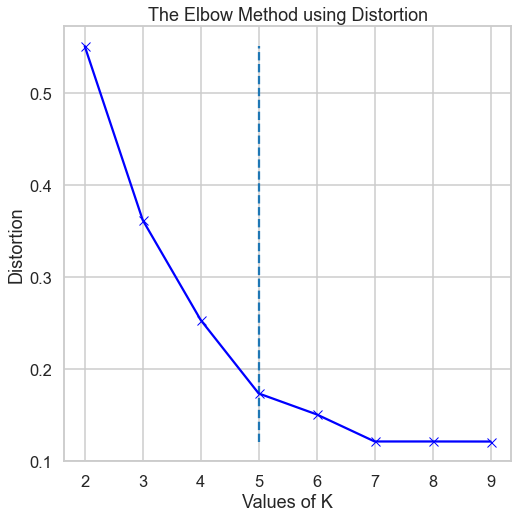

k : 4


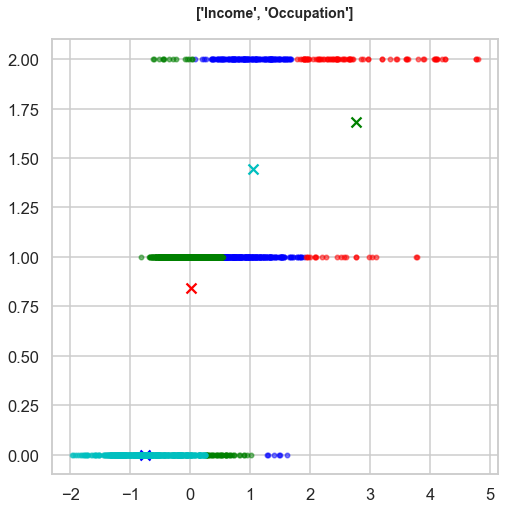

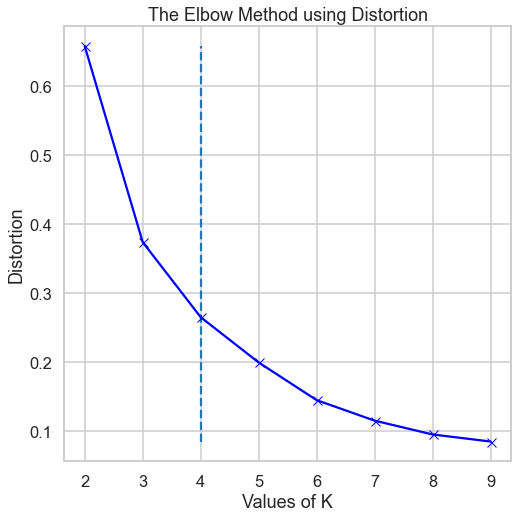

k : 4


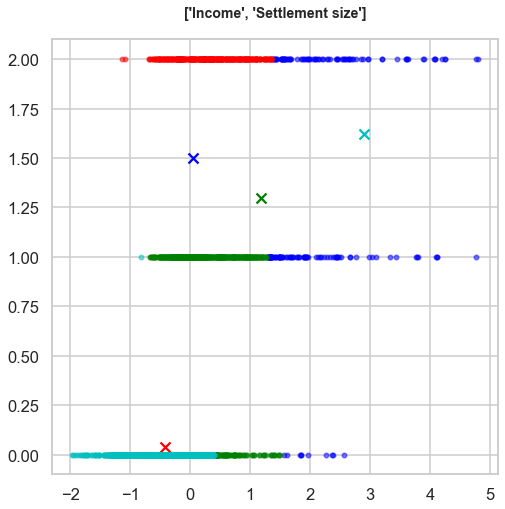

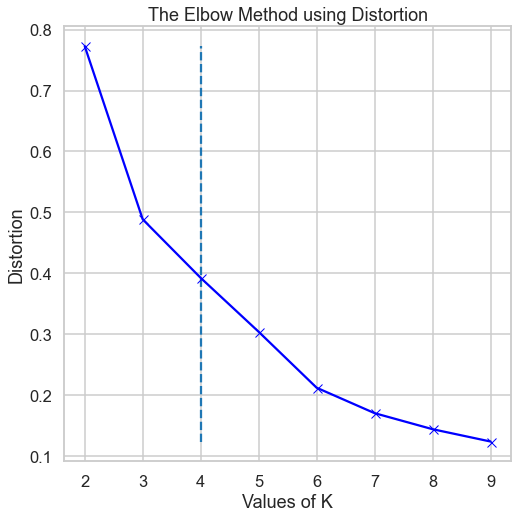

k : 5


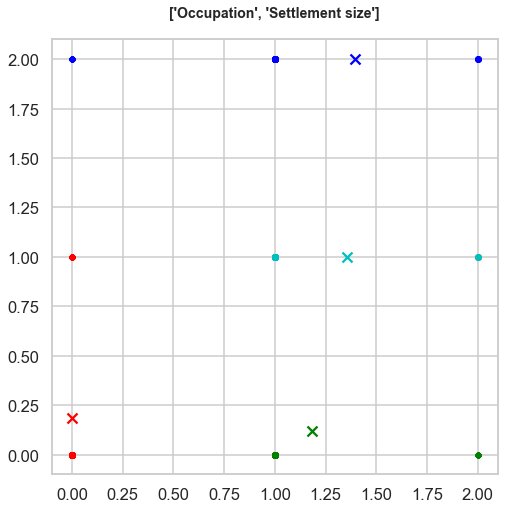

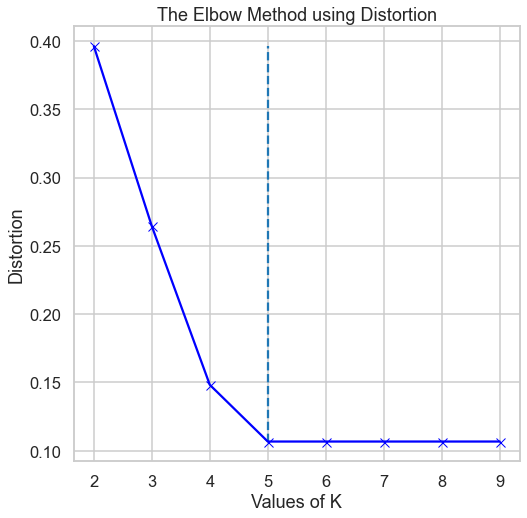

In [129]:
# Two_D(df,4)